In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.io as pio
import plotly.express as px
from datetime import datetime
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from collections import Counter

In [2]:
df = pd.read_csv('data.csv', delimiter=',')
df.head()

,Unnamed: 0,Название,Издатель,Продажи (млн),Дата выхода_x,Жанр,Цена,ID,Дата выхода_y,Рейтинг,...,Описание,Издатели,Возрастной рейтинг (ESRB),Разработчики,Теги,Популярность (added),Достижения (кол-во),Платформы,Магазины,Команда разработчиков (кол-во)
0,0,Grand Theft Auto,Rockstar Games,440.00m,27th Mar 98,Action,$58.37,52998.0,1997-10-21,3.86,...,Grand Theft Auto is an action-adventure game w...,"Take Two Interactive, BMG Interactive, ASC Games",Mature,"DMA Design, Visual Sciences, Tarantula Studios","Singleplayer, Multiplayer, Open World, 2D, Cla...",1910.0,0.0,"Game Boy Color, PlayStation, Game Boy, PC",Steam,10.0
1,1,Minecraft,Mojang,300.00m,18th Nov 11,"Action, Adventure, Casual + 1",$13.69,22509.0,2009-05-10,4.43,...,"One of the most popular games of the 2010s, Mi...","Microsoft Studios, Mojang",Everyone 10+,"4J Studios, Mojang","Multiplayer, Sandbox, 3D, Crafting, Building, ...",8566.0,149.0,"Android, PS Vita, PlayStation 4, PlayStation 3...","Nintendo Store, App Store, PlayStation Store, ...",9.0
2,3,Grand Theft Auto V,Rockstar Games,210.00m,17th Sep 13,"Action, Adventure",$9.34,3498.0,2013-09-17,4.47,...,"Rockstar Games went bigger, since their previo...",Rockstar Games,Mature,"Rockstar North, Rockstar Games","Singleplayer, Steam Achievements, Multiplayer,...",21872.0,57.0,"PC, PlayStation 5, Xbox Series S/X, PlayStatio...","PlayStation Store, Epic Games, Steam, Xbox 360...",10.0
3,4,Assassin's Creed,Ubisoft,200.00m,13th Nov 07,"Action, Adventure",$2.54,4729.0,2007-11-13,3.91,...,The game takes place in 1191. In the present t...,Ubisoft Entertainment,Mature,Ubisoft,"Stealth, Space, Assassin, character, city, Inv...",5336.0,63.0,"PlayStation 3, Xbox 360, Xbox One, PC","Xbox Store, PlayStation Store, Xbox 360 Store",7.0
4,5,The Sims,Electronic Arts,200.00m,04th Feb 00,Simulation,$28.48,31080.0,2000-02-01,4.21,...,"In ""SimCity,"" you had the power to build and c...",Electronic Arts,Teen,"Maxis, The Sims Studio","Sandbox, console, pack",786.0,0.0,"Linux, PlayStation 2, PC, PlayStation, Classic...",NaN,10.0


In [8]:
df = pd.read_csv('data.csv', delimiter=',')

df = df.drop(columns=["Playtime", "Достижения (кол-во)", "Дата выхода_y"])

df = df.rename(columns={"Unnamed: 0": "id1",
                   "ID": "id2",
                   'Продажи (млн)': 'Продажи',
                   'Возрастной рейтинг (ESRB)': 'Возрастной рейтинг',
                   'Популярность (added)': 'Популярность',
                   'Достижения (кол-во)': 'Достижения',
                   'Команда разработчиков (кол-во)': 'Размер Команды',
                    'Дата выхода_x': 'Дата выхода',
                        'Оценок': 'Кол-во оценок'})

# Преобразуем в числовой формат и умножаем на 1000 для представления в тысячах
df["Продажи"] = df["Продажи"].replace({"m": ""}, regex=True).astype(float)*1000

df["Цена"] = df["Цена"].replace({",": "", "\$": "", "Free": "0"}, regex=True).astype(float)
df = df[df["Цена"] <= 150]

df["Дата выхода"] = pd.to_datetime(df["Дата выхода"])

# Устранинем случаев неккоректного перевода в datetime (напр. 07Jan79)
mask_y = df["Дата выхода"].dt.year > 2026
df.loc[mask_y, "Дата выхода"] = df.loc[mask_y, "Дата выхода"] - pd.DateOffset(years=100)

df.isnull().sum(), df.dtypes

<ipython-input-8-e348a04a8c77>:21: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df["Дата выхода"] = pd.to_datetime(df["Дата выхода"])


(id1                     0
 Название                0
 Издатель                0
 Продажи                 0
 Дата выхода             0
 Жанр                    0
 Цена                    0
 id2                   113
 Рейтинг               113
 Metacritic            461
 Кол-во оценок         113
 Описание              120
 Издатели              119
 Возрастной рейтинг    558
 Разработчики          122
 Теги                  126
 Популярность          113
 Платформы             113
 Магазины              140
 Размер Команды        113
 dtype: int64,
 id1                            int64
 Название                      object
 Издатель                      object
 Продажи                      float64
 Дата выхода           datetime64[ns]
 Жанр                          object
 Цена                         float64
 id2                          float64
 Рейтинг                      float64
 Metacritic                   float64
 Кол-во оценок                float64
 Описание                  

In [9]:
df.head()

,id1,Название,Издатель,Продажи,Дата выхода,Жанр,Цена,id2,Рейтинг,Metacritic,Кол-во оценок,Описание,Издатели,Возрастной рейтинг,Разработчики,Теги,Популярность,Платформы,Магазины,Размер Команды
0,0,Grand Theft Auto,Rockstar Games,440000.0,1998-03-27,Action,58.37,52998.0,3.86,NaN,395.0,Grand Theft Auto is an action-adventure game w...,"Take Two Interactive, BMG Interactive, ASC Games",Mature,"DMA Design, Visual Sciences, Tarantula Studios","Singleplayer, Multiplayer, Open World, 2D, Cla...",1910.0,"Game Boy Color, PlayStation, Game Boy, PC",Steam,10.0
1,1,Minecraft,Mojang,300000.0,2011-11-18,"Action, Adventure, Casual + 1",13.69,22509.0,4.43,83.0,2952.0,"One of the most popular games of the 2010s, Mi...","Microsoft Studios, Mojang",Everyone 10+,"4J Studios, Mojang","Multiplayer, Sandbox, 3D, Crafting, Building, ...",8566.0,"Android, PS Vita, PlayStation 4, PlayStation 3...","Nintendo Store, App Store, PlayStation Store, ...",9.0
2,3,Grand Theft Auto V,Rockstar Games,210000.0,2013-09-17,"Action, Adventure",9.34,3498.0,4.47,92.0,7039.0,"Rockstar Games went bigger, since their previo...",Rockstar Games,Mature,"Rockstar North, Rockstar Games","Singleplayer, Steam Achievements, Multiplayer,...",21872.0,"PC, PlayStation 5, Xbox Series S/X, PlayStatio...","PlayStation Store, Epic Games, Steam, Xbox 360...",10.0
3,4,Assassin's Creed,Ubisoft,200000.0,2007-11-13,"Action, Adventure",2.54,4729.0,3.91,80.0,1942.0,The game takes place in 1191. In the present t...,Ubisoft Entertainment,Mature,Ubisoft,"Stealth, Space, Assassin, character, city, Inv...",5336.0,"PlayStation 3, Xbox 360, Xbox One, PC","Xbox Store, PlayStation Store, Xbox 360 Store",7.0
4,5,The Sims,Electronic Arts,200000.0,2000-02-04,Simulation,28.48,31080.0,4.21,88.0,408.0,"In ""SimCity,"" you had the power to build and c...",Electronic Arts,Teen,"Maxis, The Sims Studio","Sandbox, console, pack",786.0,"Linux, PlayStation 2, PC, PlayStation, Classic...",NaN,10.0


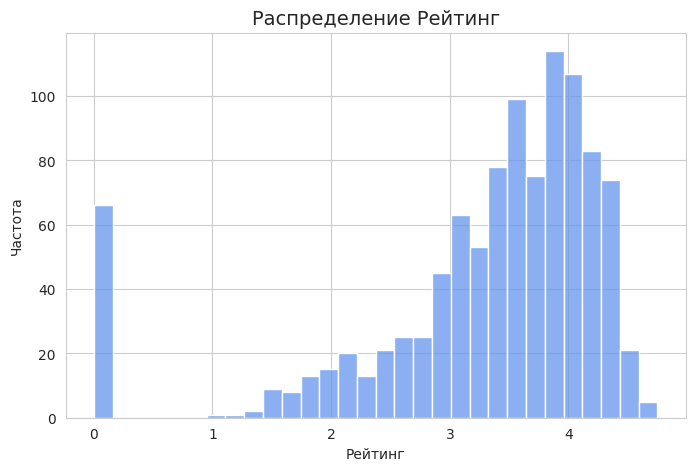

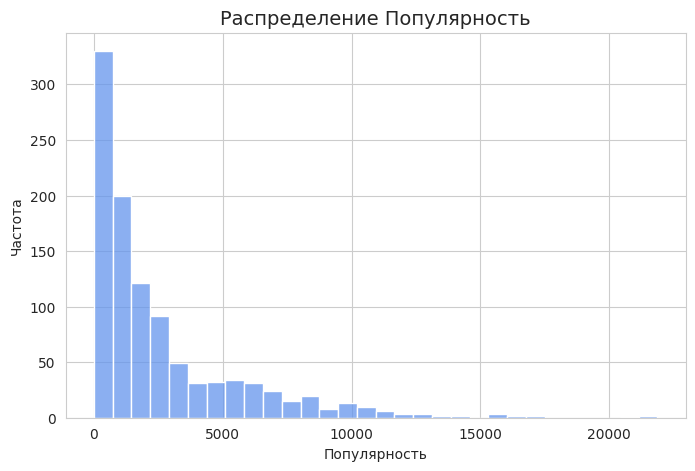

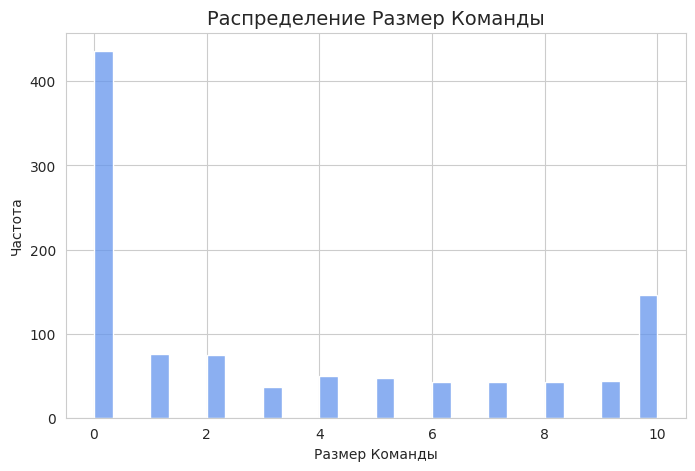

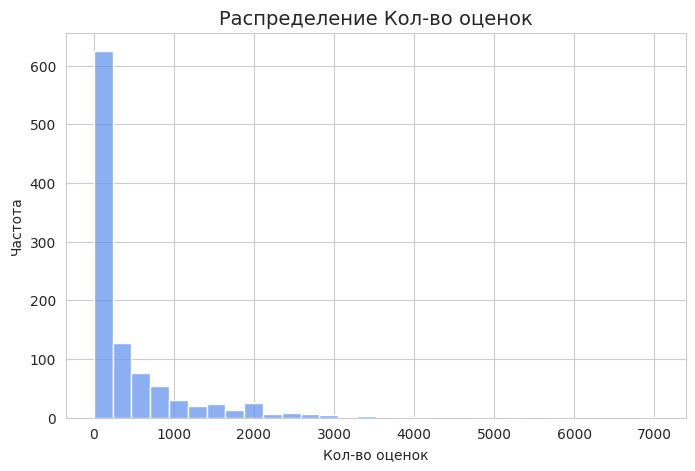

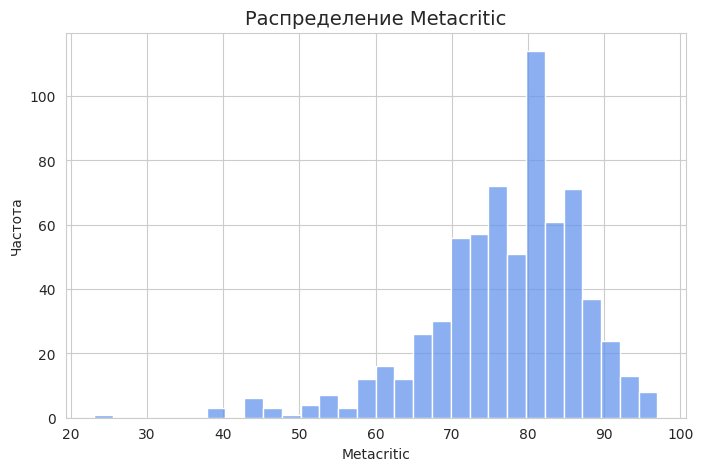

In [7]:
sns.set_style("whitegrid")
sns.set_palette("Blues")

numeric_columns = ["Рейтинг", "Популярность", "Размер Команды", 'Кол-во оценок', 'Metacritic']

for col in numeric_columns:
    plt.figure(figsize=(8, 5))
    sns.histplot(df[col], bins=30, color="cornflowerblue")
    plt.title(f"Распределение {col}", fontsize=14)
    plt.xlabel(col)
    plt.ylabel("Частота")
    plt.show()

Выбросы по цене связаны с тем, что игры бывают эксклюзивные, старые, дисковые, на них цена может быть очень большая, потому что она укана актуальная на текущий момент

<ipython-input-10-2007b5ade0e6>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot( x=top_values.values, y=top_values.index, palette="Blues_r")


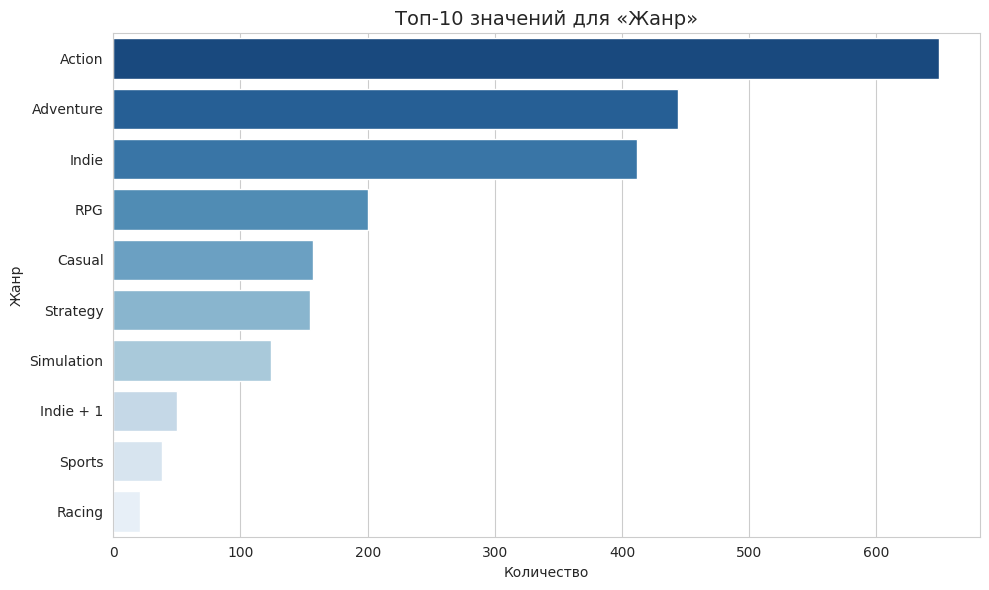

<ipython-input-10-2007b5ade0e6>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot( x=top_values.values, y=top_values.index, palette="Blues_r")


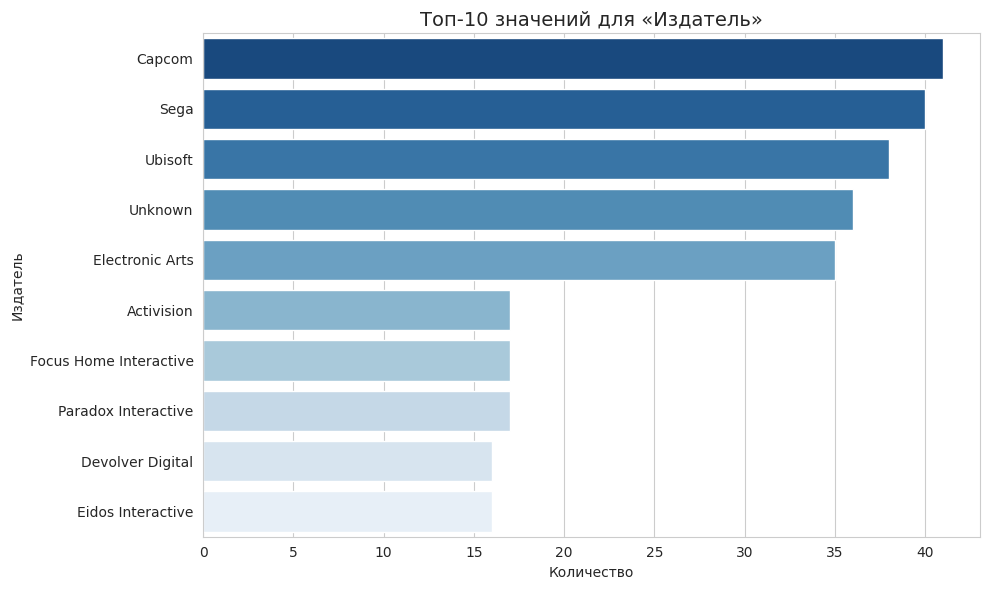

<ipython-input-10-2007b5ade0e6>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot( x=top_values.values, y=top_values.index, palette="Blues_r")


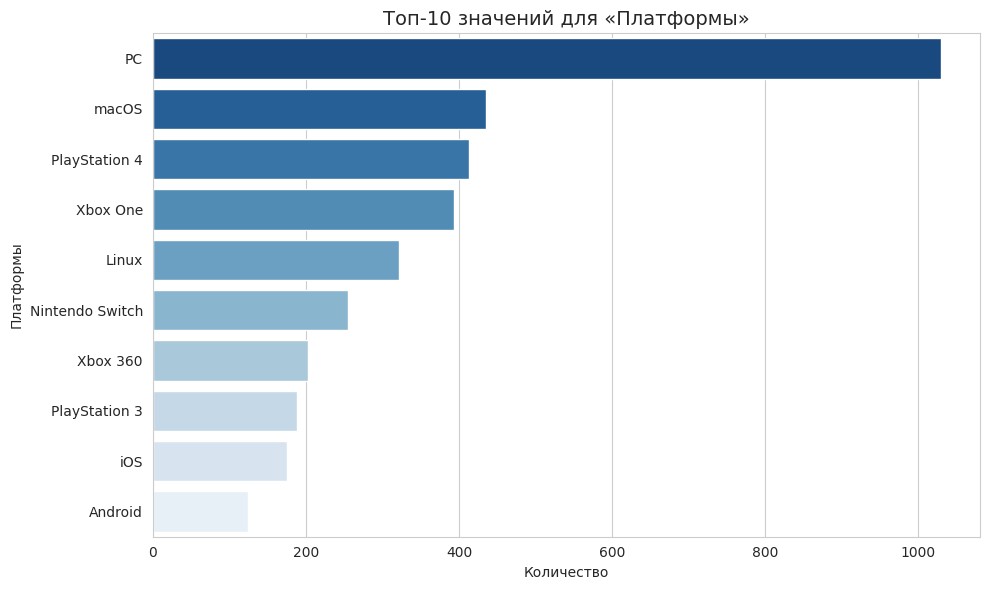

<ipython-input-10-2007b5ade0e6>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot( x=top_values.values, y=top_values.index, palette="Blues_r")


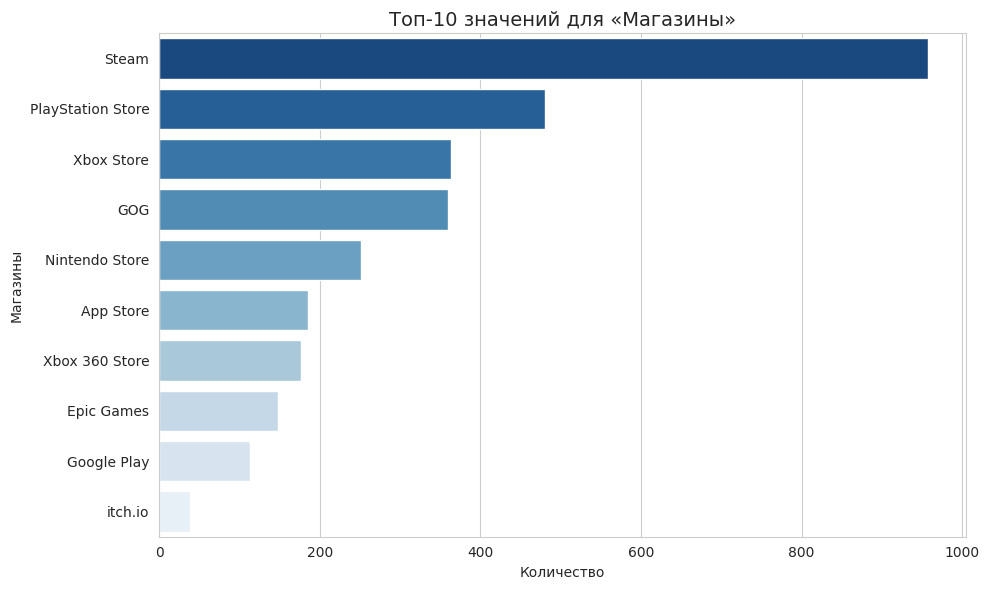

<ipython-input-10-2007b5ade0e6>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot( x=top_values.values, y=top_values.index, palette="Blues_r")


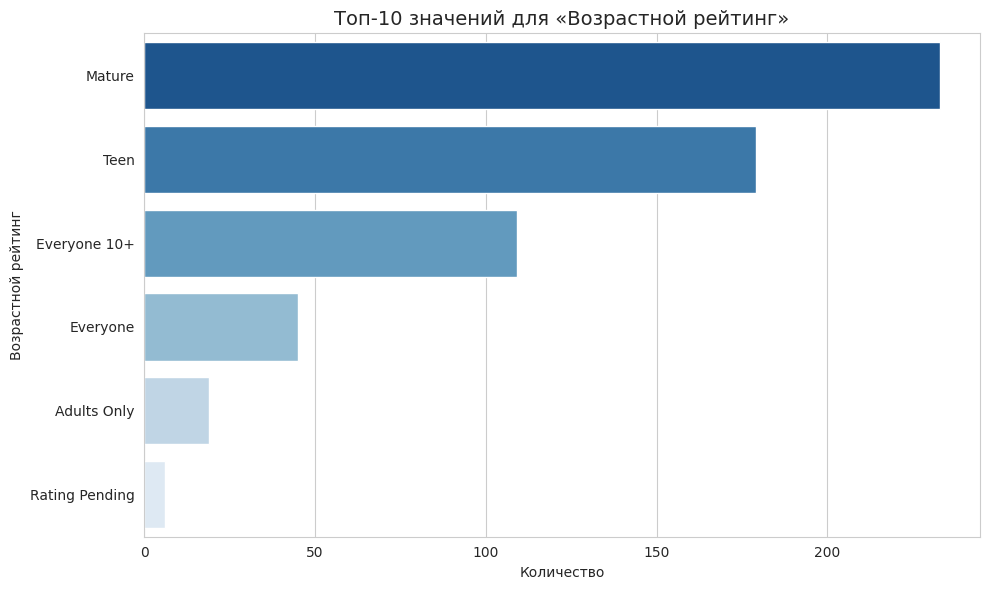

In [10]:
categorical_columns = ["Жанр", "Издатель", "Платформы", "Магазины", "Возрастной рейтинг"]

for col in categorical_columns:

    # Разделяем каждую строку в каждом столбце по ", ", превращая её в список
    # И разбиваем списки на отдельные строки
    exploded_values = df[col].str.split(", ").explode()

    # Получаем топ-10 самых частых значений в текущем столбце
    top_values = exploded_values.value_counts().head(10)

    plt.figure(figsize=(10, 6))
    sns.barplot( x=top_values.values, y=top_values.index, palette="Blues_r")
    plt.title(f"Топ-10 значений для «{col}»", fontsize=14)
    plt.xlabel("Количество")
    plt.ylabel(col)
    plt.tight_layout()
    plt.show()

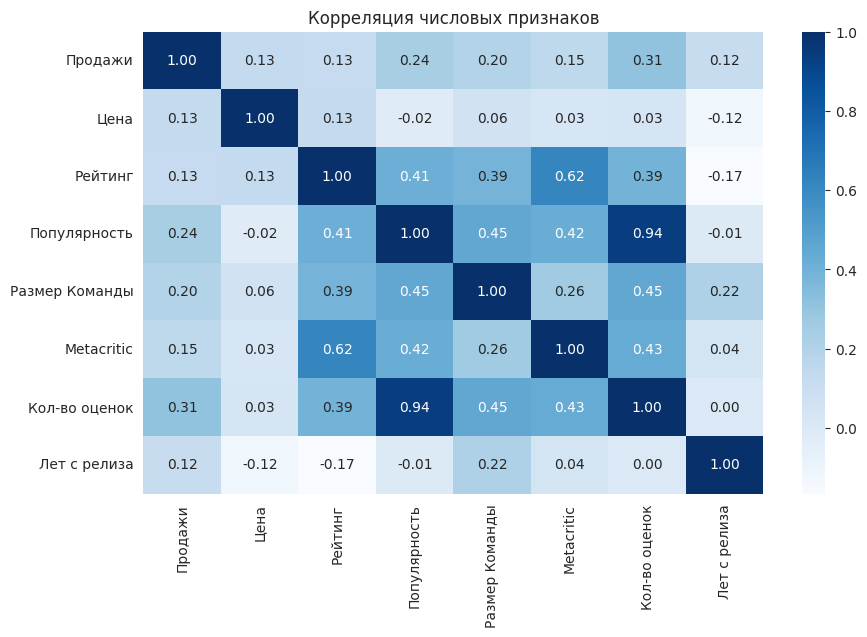

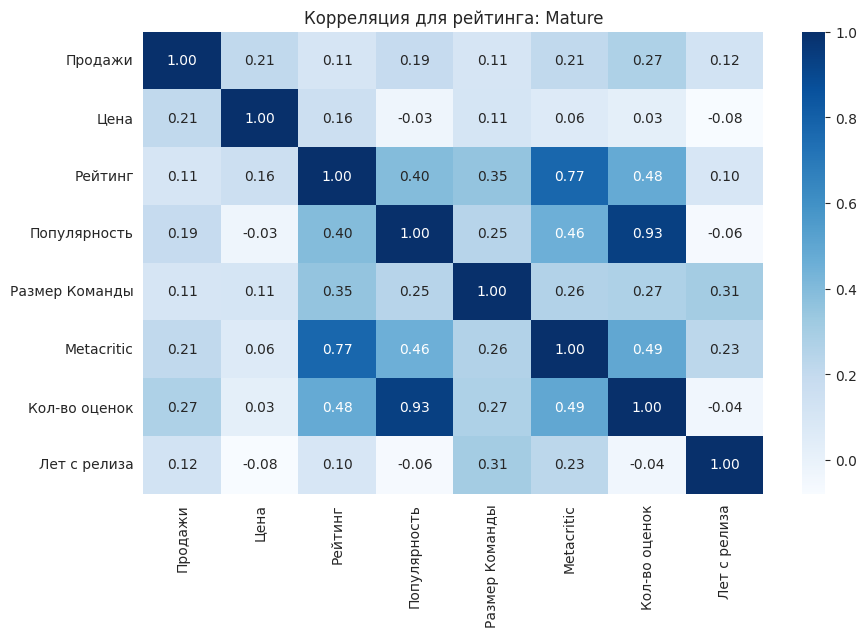

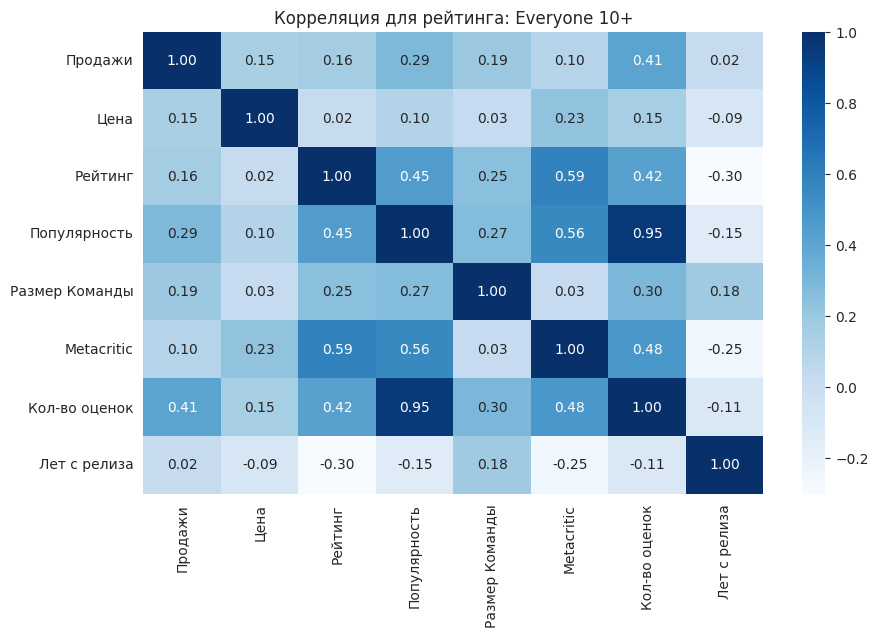

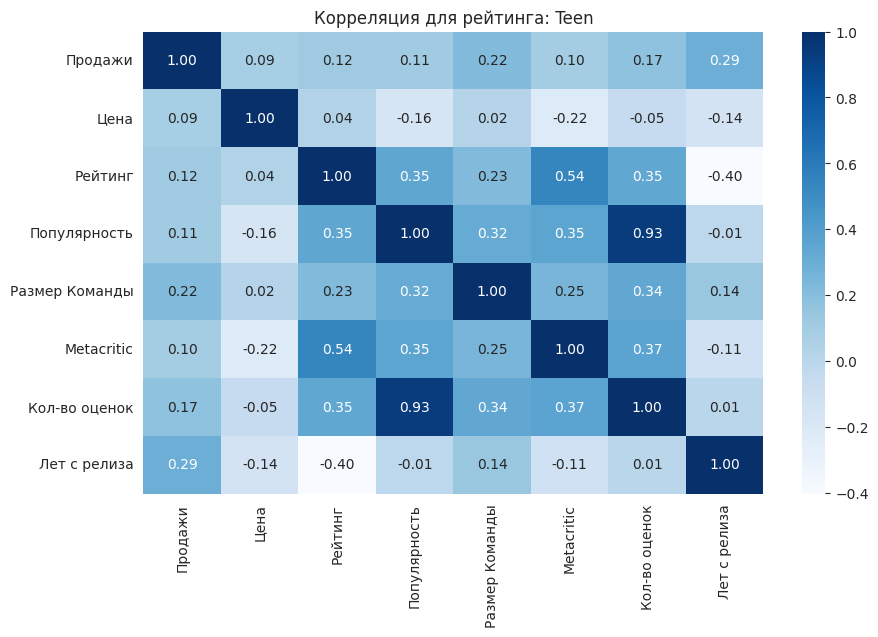

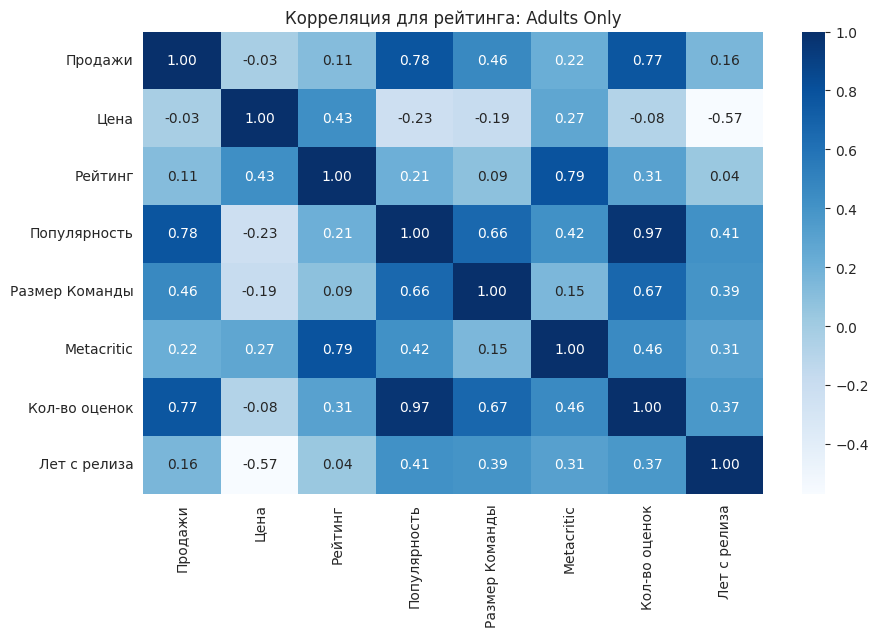

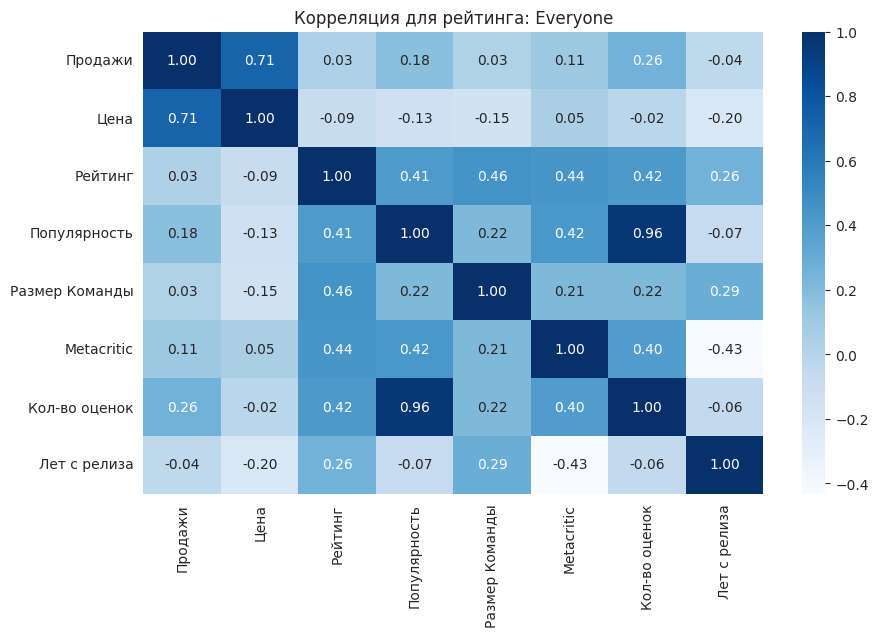

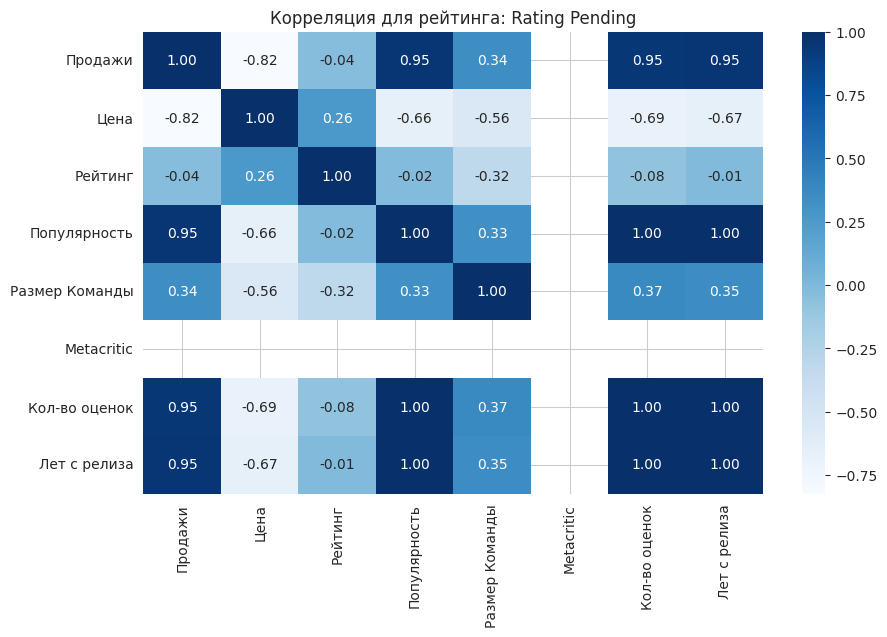

In [13]:
current_date = datetime(2025, 3, 1)

# Вычитаем дату выхода из текущей даты, получаем разницу в днях и переводим в годы
df["Лет с релиза"] = ((current_date - df["Дата выхода"]).dt.days // 365)

numeric_cols = ["Продажи", "Цена", "Рейтинг", "Популярность", "Размер Команды", "Metacritic", "Кол-во оценок", "Лет с релиза"]

plt.figure(figsize=(10, 6))
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap="Blues", fmt=".2f")
plt.title("Корреляция числовых признаков")
plt.show()

for rating in df["Возрастной рейтинг"].dropna().unique():
    plt.figure(figsize=(10, 6))
    sns.heatmap(df[df["Возрастной рейтинг"] == rating][numeric_cols].corr(), annot=True, cmap="Blues", fmt=".2f")
    plt.title(f"Корреляция для рейтинга: {rating}")
    plt.show()

<ipython-input-11-4870f3acc4da>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Возрастной рейтинг", y="Цена", data=df, palette="Blues")


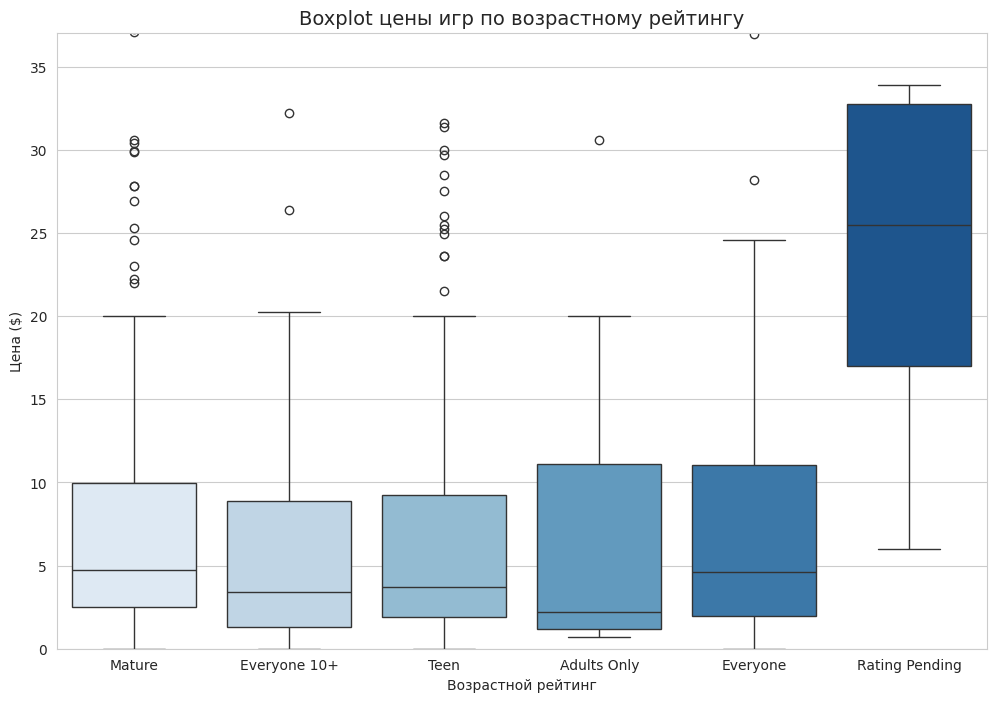

In [11]:
plt.figure(figsize=(12, 8))
sns.boxplot(x="Возрастной рейтинг", y="Цена", data=df, palette="Blues")

# Верхняя граница Y 90-й процентиль цены среди игр с продажами ≥ 10 000
plt.ylim(0, df[df['Продажи'] >= 10000]["Цена"].quantile(0.9))
plt.title("Boxplot цены игр по возрастному рейтингу", fontsize=14)
plt.xlabel("Возрастной рейтинг")
plt.ylabel("Цена ($)")
plt.show()

<ipython-input-14-a2597f8c83b1>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Категория возраста", y="Цена", data=df, palette="Blues")


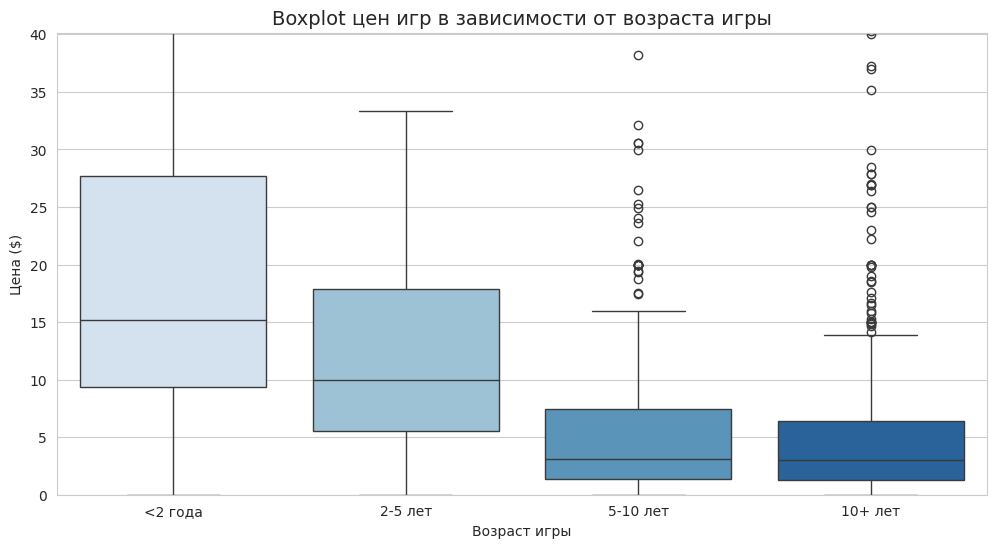

In [14]:
bins = [0, 2, 5, 10, float("inf")]
labels = ["<2 года", "2-5 лет", "5-10 лет", "10+ лет"]
df["Категория возраста"] = pd.cut(df["Лет с релиза"], bins=bins, labels=labels)

plt.figure(figsize=(12, 6))
sns.boxplot(x="Категория возраста", y="Цена", data=df, palette="Blues")
plt.ylim(0, df["Цена"].quantile(0.97))
plt.title("Boxplot цен игр в зависимости от возраста игры", fontsize=14)
plt.xlabel("Возраст игры")
plt.ylabel("Цена ($)")
plt.show()

In [15]:
df["Год выхода"] = df["Дата выхода"].dt.year
avg_price_per_year = df[df['Цена'] != 0].groupby("Год выхода")["Цена"].mean().reset_index()

fig = px.line(avg_price_per_year, x="Год выхода", y="Цена", markers=True, title="Средняя цена игр по годам выхода")
fig.update_layout(xaxis_title="Год выхода игры", yaxis_title="Средняя цена ($)")

fig.show()

In [16]:
df["Год выхода"] = df["Дата выхода"].dt.year
df = df.dropna(subset=["Год выхода"])
df["Год выхода"] = df["Год выхода"].astype(int)

cumulative_sales = (
    df.groupby(["Год выхода", "Возрастной рейтинг"])
    ["Продажи"].sum().reset_index())

# Для каждой строки суммируются все предыдущие значения из того же столбца
cumulative_sales["Накопленные продажи"] = (
    cumulative_sales.groupby("Возрастной рейтинг")["Продажи"].cumsum())

rating_order = ["Mature", "Teen", "Everyone 10+", "Everyone", "Adults Only", "Rating Pending"]

fig = px.line(
    cumulative_sales,
    x="Год выхода",
    y="Накопленные продажи",
    color="Возрастной рейтинг",
    category_orders={"Возрастной рейтинг": rating_order},
    markers=True,
    title="Накопительные продажи игр по возрастным рейтингам")

fig.update_layout(
    xaxis_title="Год выхода игры",
    yaxis_title="Накопленные продажи (млн.)",
    legend_title="Возрастной рейтинг (ESRB)",
    template="plotly_white")

fig.show()

In [17]:
price_bins = [0, 0.1, 2.5, 5, 10, 20, float("inf")]
price_labels = [
"Бесплатные", "Очень дешевые", "Дешевые", "Обычные", "Дорогие", "Очень дорогие"]

# Категоризация цен в дф
df["Ценовой сегмент"] = pd.cut(
    df["Цена"], bins=price_bins, labels=price_labels, right=False)

sales_by_price_and_rating = (
    df.groupby(["Возрастной рейтинг", "Ценовой сегмент"])
    ["Продажи"].sum().reset_index())

age_ratings = df["Возрастной рейтинг"].dropna().unique()
n = len(age_ratings)

fig = make_subplots(
    rows=1, cols=n,
    specs=[[{'type': 'domain'}] * n],
    subplot_titles=age_ratings)

# Добавление круговых диаграмм по возрастным рейтингам
for i, rating in enumerate(age_ratings):
    subset = sales_by_price_and_rating[sales_by_price_and_rating["Возрастной рейтинг"] == rating]
    fig.add_trace(go.Pie(
            labels=subset["Ценовой сегмент"],
            values=subset["Продажи"],
            name=rating,
            hoverinfo='label+percent',
            textinfo='percent'),
            row=1, col=i+1)

fig.update_layout(
    title_text="Распределение продаж по ценовым сегментам для каждого возрастного рейтинга",
    template="plotly_white",
    height=500,
    width=300 * n)

fig.show()

<ipython-input-17-6615bc562f54>:10: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



<ipython-input-18-164a930ca07f>:6: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




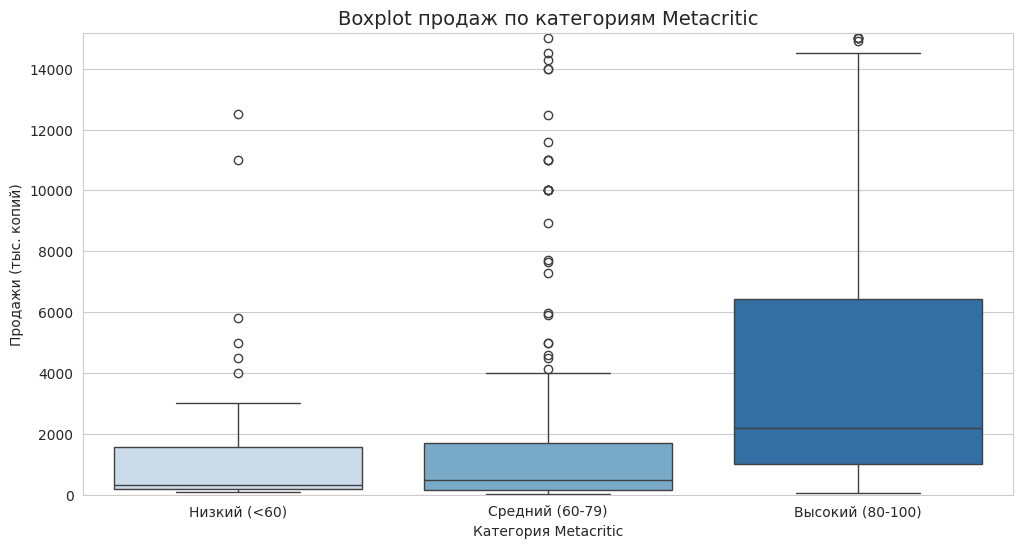

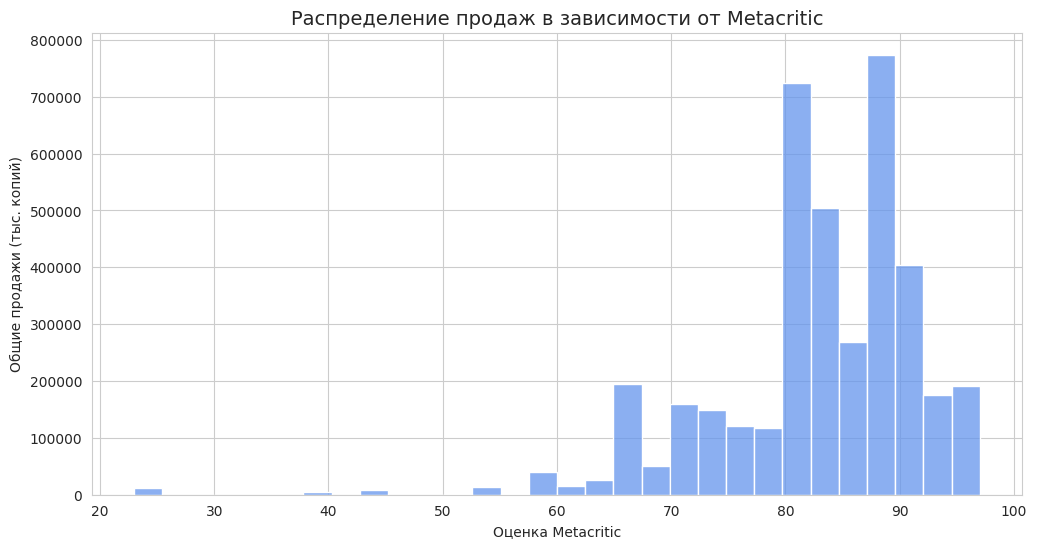

In [18]:
bins = [0, 60, 80, 100]
labels = ["Низкий (<60)", "Средний (60-79)", "Высокий (80-100)"]
df["Категория Metacritic"] = pd.cut(df["Metacritic"], bins=bins, labels=labels, right=False)

plt.figure(figsize=(12, 6))
sns.boxplot(x="Категория Metacritic", y="Продажи", data=df, palette="Blues")
plt.ylim(0, df["Продажи"].quantile(0.95))
plt.title("Boxplot продаж по категориям Metacritic", fontsize=14)
plt.xlabel("Категория Metacritic")
plt.ylabel("Продажи (тыс. копий)")
plt.show()

plt.figure(figsize=(12, 6))
sns.histplot(df, x="Metacritic", weights="Продажи", bins=30, color="cornflowerblue")
plt.title("Распределение продаж в зависимости от Metacritic", fontsize=14)
plt.xlabel("Оценка Metacritic")
plt.ylabel("Общие продажи (тыс. копий)")
plt.show()

In [19]:
df_exploded = df.copy()
df_exploded["Платформа"] = df_exploded["Платформы"].str.split(", ")
df_exploded = df_exploded.explode("Платформа")

top_platforms = df_exploded["Платформа"].value_counts().nlargest(5).index
df_filtered = df_exploded[df_exploded["Платформа"].isin(top_platforms)]

fig = px.box(
    df_filtered,
    x="Платформа",
    y="Продажи",
    color="Категория Metacritic",
    category_orders={"Платформа": list(top_platforms)},
    title="Распределение продаж по платформам и категориям Metacritic")

fig.update_layout(
    yaxis=dict(range=[0, df["Продажи"].quantile(0.95)]),
    xaxis_title="Платформа",
    yaxis_title="Продажи (тыс. копий)",
    template="plotly_white",
    legend_title="Категория Metacritic",
    xaxis_tickangle=-45)

fig.show()

In [20]:
df["Количество магазинов"] = df["Магазины"].astype(str).str.count(",") + 1
df_filtered = df[df["Количество магазинов"] <= 6]

fig = px.box(
    df_filtered,
    x="Количество магазинов",
    y="Продажи",
    color="Количество магазинов",
    title="Распределение продаж в зависимости от количества магазинов")

fig.update_layout(
    yaxis=dict(range=[0, df["Продажи"].quantile(0.95)]),
    xaxis_title="Количество магазинов, где продаётся игра",
    yaxis_title="Продажи (тыс. копий)",
    template="plotly_white",
    showlegend=False )

fig.show()

In [21]:
df["Количество платформ"] = df["Платформы"].astype(str).str.count(",") + 1
df_filtered = df[df["Количество платформ"] <= 6]

fig = px.box(
    df_filtered,
    x="Количество платформ",
    y="Продажи",
    color="Количество платформ",
    title="Распределение продаж в зависимости от количества платформ")

fig.update_layout(
    yaxis=dict(range=[0, df["Продажи"].quantile(0.95)]),
    xaxis_title="Количество платформ, на которых доступна игра",
    yaxis_title="Продажи (тыс. копий)",
    template="plotly_white",
    showlegend=False )

fig.show()

In [22]:
def categorize_game(tags):
    tag_list = str(tags).split(", ")  # Преобразуем теги в список
    if {"Multiplayer", "Singleplayer"} <= set(tag_list):
        return "Both"
    elif "Multiplayer" in tag_list:
        return "Multiplayer"
    elif "Singleplayer" in tag_list:
        return "Singleplayer"
    else:
        return "Unknown"

df["Game Type"] = df["Теги"].apply(categorize_game)
df_filtered = df[df["Game Type"] != "Unknown"]

fig = px.box(
    df_filtered,
    x="Game Type",
    y="Продажи",
    color="Game Type",
    title="Распределение продаж для Singleplayer, Multiplayer и Both")

fig.update_layout(
    yaxis=dict(range=[0, df_filtered["Продажи"].quantile(0.95)]),
    xaxis_title="Тип игры",
    yaxis_title="Продажи (тыс. копий)",
    template="plotly_white",
    showlegend=False)

fig.show()

In [23]:
all_tags = df["Теги"].dropna().str.split(", ").explode()
tag_counts = Counter(all_tags)

tag_df = (pd.DataFrame(tag_counts.items(), columns=["Тег", "Количество"])
    .sort_values(by="Количество", ascending=False))

tag_df.head(30)

,Тег,Количество
0,Singleplayer,945
15,Steam Achievements,688
49,Steam Cloud,468
89,steam-trading-cards,437
1,Multiplayer,427
16,Full controller support,395
17,Atmospheric,337
18,Great Soundtrack,332
19,RPG,277
20,Co-op,268


<ipython-input-24-878b7766bf1c>:14: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


<ipython-input-24-878b7766bf1c>:20: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


<ipython-input-24-878b7766bf1c>:26: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




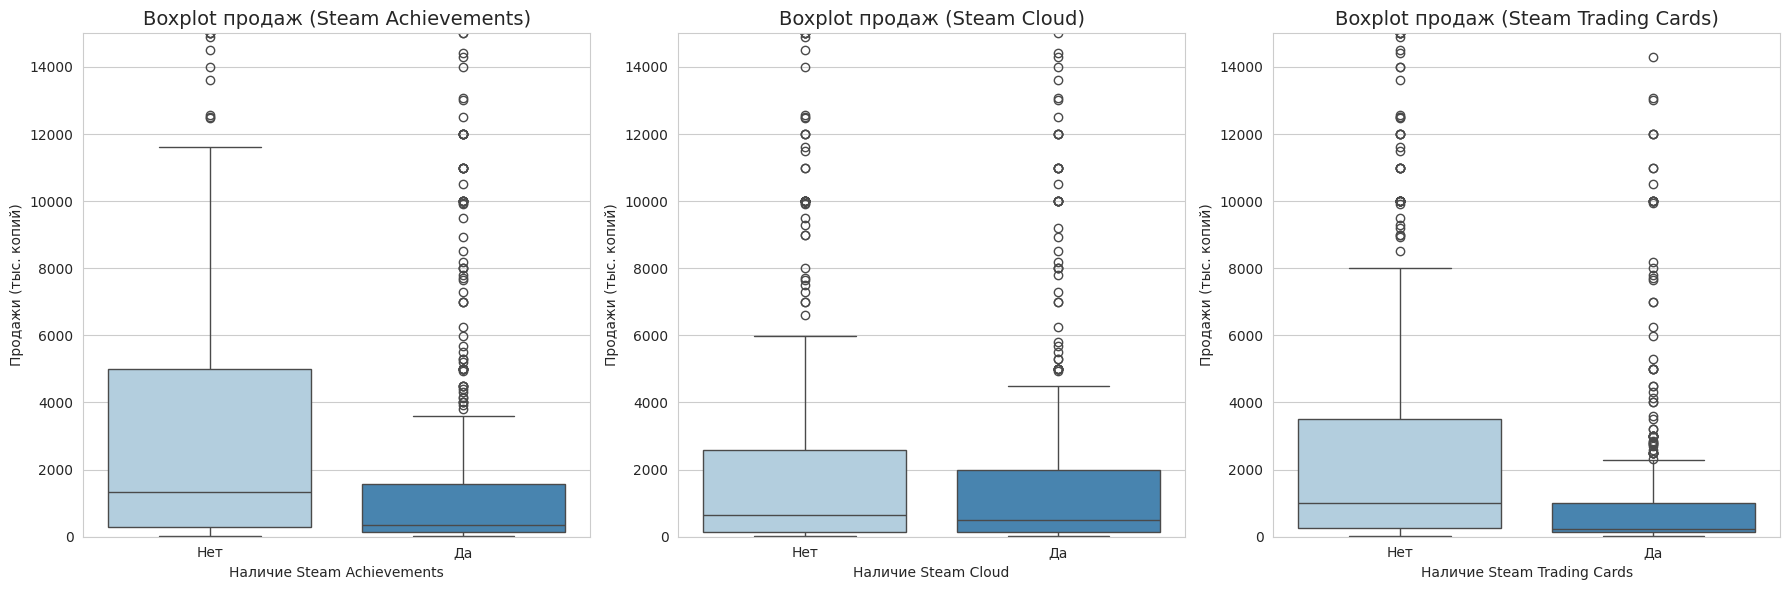

In [24]:
# Ищем строки, содержащие "Steam" без учета регистра
df_steam = df[df["Магазины"].str.contains("Steam", na=False, case=False)].copy()

def has_tag(tag_list, tag):
    return "Да" if tag in str(tag_list) else "Нет"

# Создаем новые булеве столбецы с помощью функции has_tag
df_steam["Has Steam Achievements"] = df_steam["Теги"].apply(has_tag, args=("Steam Achievements",))
df_steam["Has Steam Cloud"] = df_steam["Теги"].apply(has_tag, args=("Steam Cloud",))
df_steam["Has Steam Trading Cards"] = df_steam["Теги"].apply(has_tag, args=("steam-trading-cards",))

fig, axes = plt.subplots(1, 3, figsize=(18, 6))

sns.boxplot(x="Has Steam Achievements", y="Продажи", data=df_steam, palette="Blues", ax=axes[0])
axes[0].set_ylim(0, df_steam["Продажи"].quantile(0.95))
axes[0].set_title("Boxplot продаж (Steam Achievements)", fontsize=14)
axes[0].set_xlabel("Наличие Steam Achievements")
axes[0].set_ylabel("Продажи (тыс. копий)")

sns.boxplot(x="Has Steam Cloud", y="Продажи", data=df_steam, palette="Blues", ax=axes[1])
axes[1].set_ylim(0, df_steam["Продажи"].quantile(0.95))
axes[1].set_title("Boxplot продаж (Steam Cloud)", fontsize=14)
axes[1].set_xlabel("Наличие Steam Cloud")
axes[1].set_ylabel("Продажи (тыс. копий)")

sns.boxplot(x="Has Steam Trading Cards", y="Продажи", data=df_steam, palette="Blues", ax=axes[2])
axes[2].set_ylim(0, df_steam["Продажи"].quantile(0.95))
axes[2].set_title("Boxplot продаж (Steam Trading Cards)", fontsize=14)
axes[2].set_xlabel("Наличие Steam Trading Cards")
axes[2].set_ylabel("Продажи (тыс. копий)")

plt.tight_layout()
plt.show()

<ipython-input-25-d03ff807db77>:18: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




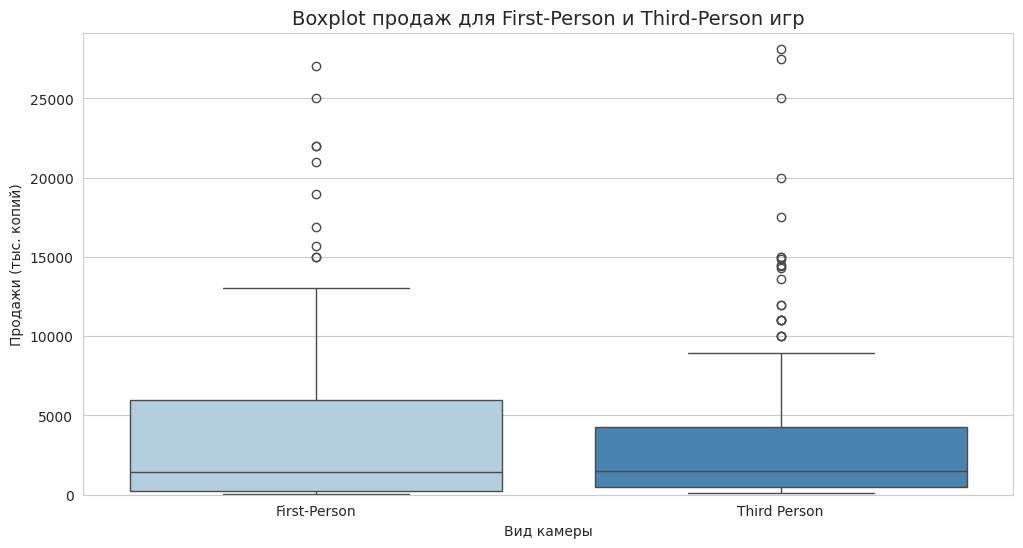

In [25]:
df_steam = df[df["Магазины"].str.contains("Steam", na=False, case=False)].copy()

# Функция для определения вида камеры в игре
def categorize_perspective(tags):
    tags = str(tags).split(", ")
    if "First-Person" in tags:
        return "First-Person"
    elif "Third Person" in tags:
        return "Third Person"
    else:
        return "Unknown"

# Добавляем столбец с классификацией вида камеры
df_steam["Perspective"] = df_steam["Теги"].apply(categorize_perspective)
df_filtered = df_steam[df_steam["Perspective"] != "Unknown"]

plt.figure(figsize=(12, 6))
sns.boxplot(x="Perspective", y="Продажи", data=df_filtered, palette="Blues")
plt.ylim(0, df_filtered["Продажи"].quantile(0.95))
plt.title("Boxplot продаж для First-Person и Third-Person игр", fontsize=14)
plt.xlabel("Вид камеры")
plt.ylabel("Продажи (тыс. копий)")
plt.show()

<ipython-input-26-67eda33ca6ee>:11: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


<ipython-input-26-67eda33ca6ee>:17: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




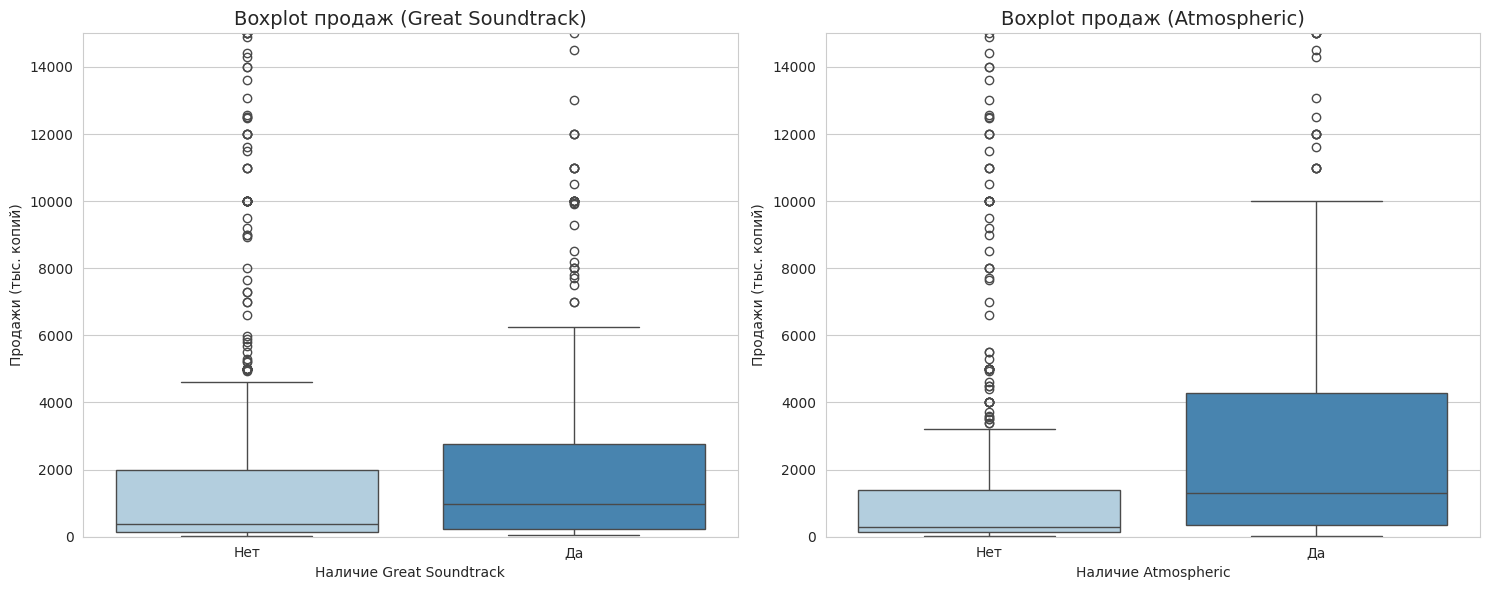

In [26]:
df_steam = df[df["Магазины"].str.contains("Steam", na=False, case=False)].copy()

def has_tag(tags, tag):
    return "Да" if tag in str(tags) else "Нет"

df_steam["Has Great Soundtrack"] = df_steam["Теги"].apply(has_tag, args=("Great Soundtrack",))
df_steam["Has Atmospheric"] = df_steam["Теги"].apply(has_tag, args=("Atmospheric",))

fig, axes = plt.subplots(1, 2, figsize=(15, 6))

sns.boxplot(x="Has Great Soundtrack", y="Продажи", data=df_steam, palette="Blues", ax=axes[0])
axes[0].set_ylim(0, df_steam["Продажи"].quantile(0.95))
axes[0].set_title("Boxplot продаж (Great Soundtrack)", fontsize=14)
axes[0].set_xlabel("Наличие Great Soundtrack")
axes[0].set_ylabel("Продажи (тыс. копий)")

sns.boxplot(x="Has Atmospheric", y="Продажи", data=df_steam, palette="Blues", ax=axes[1])
axes[1].set_ylim(0, df_steam["Продажи"].quantile(0.95))
axes[1].set_title("Boxplot продаж (Atmospheric)", fontsize=14)
axes[1].set_xlabel("Наличие Atmospheric")
axes[1].set_ylabel("Продажи (тыс. копий)")

plt.tight_layout()
plt.show()